In [509]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
# !pip install statsmodels - we may need to pip stall statsmodels but should be in the requirements section
from statsmodels.graphics.gofplots import qqplot

# import the python files
from HeatPump.get_data import get_data

### Import the data 

In [510]:
# import the get data
results = get_data()
results.head()

/Users/stevenyanez/code/jxsaliba/HeatPumpEnergyPredict/HeatPump/get_data.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['context_date'] = pd.to_datetime(result['context_date'], dayfirst = True)
/Users/stevenyanez/code/jxsaliba/HeatPumpEnergyPredict/HeatPump/get_data.py:89: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['lodgement_date'] = pd.to_datetime(result['lodgement_date'], dayfirst = True)


,property_id,hub_id,zone,id,type,occupied,heating_system,heating_system_manufacturer,heating_system_model_no,number_of_zones,occurred,number_of_paired_sensors,lodgement_date,current_energy_efficiency,property_type,built_form,floor_description,windows_description,walls_description,roof_description,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_delta_energy_meter_use,daily_total_heating_use,reported_fuel_poverty_percentage,daily_temp_below18c_total_sensor_readings,hub_type
307499,20083,20071.0,1.0,20394.0,SDU,True,HEAT_PUMP_GSHP,KENSA,Shoe Box,1,05/09/23 05:37,NaN,2021-01-12,53,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 150 mm loft insulation",2.0,2.0,56.0,2020-08-30,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
308600,20083,20071.0,1.0,20394.0,SDU,True,HEAT_PUMP_GSHP,KENSA,Shoe Box,1,05/09/23 05:37,NaN,2021-01-30,55,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 250 mm loft insulation",2.0,2.0,56.0,2020-08-30,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
309701,20083,20071.0,1.0,20394.0,SDU,True,HEAT_PUMP_GSHP,KENSA,Shoe Box,1,05/09/23 05:37,NaN,2020-10-06,48,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, as built, no insulation (assumed)","Pitched, 150 mm loft insulation",2.0,2.0,56.0,2020-08-30,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
310802,20083,20071.0,1.0,20394.0,SDU,True,HEAT_PUMP_GSHP,KENSA,Shoe Box,1,05/09/23 05:37,NaN,2018-04-23,62,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 300 mm loft insulation",3.0,3.0,52.0,2020-08-30,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
311903,20083,20071.0,1.0,20394.0,SDU,True,HEAT_PUMP_GSHP,KENSA,Shoe Box,1,05/09/23 05:37,NaN,2019-09-02,62,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 270 mm loft insulation",2.0,2.0,60.0,2020-08-30,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


 ### Inspecting the data
 🧭 Exploratory Data Analysis

👥 Remove Duplicates

🤕 Impute or Remove Missing Values

🕵🏻‍♂️ Check for Outliers

📏 Scaling Numerical Features

🏷 One-Hot-Encoder for Categorical Features

👻 Label-Encoder for a Categorical Target

🍰 Feature Engineering will squeeze out better signals for your model to learn feature instead_

🍰 Target Engineering: might be easier to predict a transformed target

☠️ Not all features are our friends. Remove the "noisy" features using Feature Permutation (or VIF Analysis for Linear models)

In [549]:
print(f'This is the shape of our data {results.shape}')

This is the shape of our data (558615, 29)


# Let's get an initial idea of the correlation with the numerical variables

<Axes: >

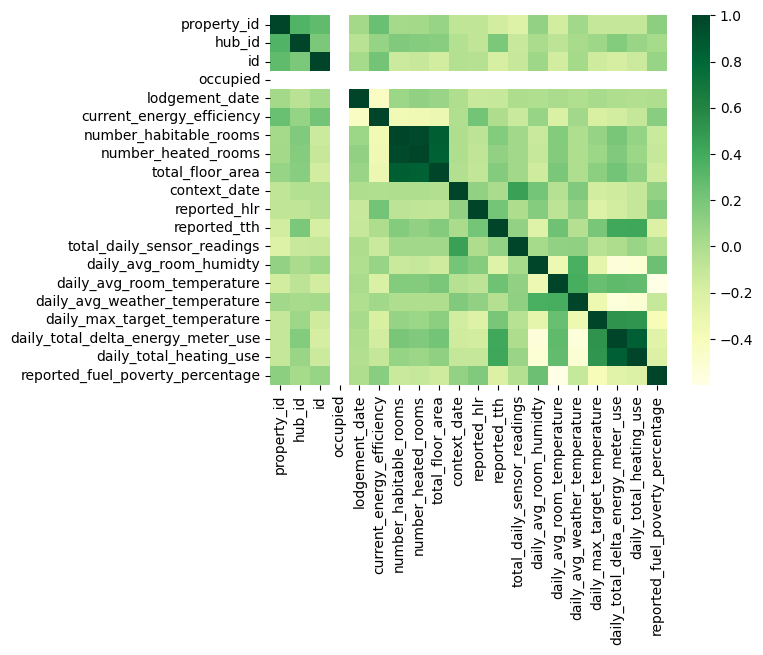

In [640]:
sns.heatmap(results.select_dtypes(exclude = 'object').corr(),cmap = 'YlGn')

In [641]:
corr_df = results.select_dtypes(exclude = 'object').corr()
corr_df = corr_df.stack().reset_index().rename(columns ={'level_0':'Feature 1', 'level_1': 'Feature 2', 0:'Correlation'}).sort_values(by ='Correlation', ascending = False)
corr_df[corr_df['Feature 1'] != corr_df['Feature 2']]

,Feature 1,Feature 2,Correlation
101,number_habitable_rooms,number_heated_rooms,0.969959
119,number_heated_rooms,number_habitable_rooms,0.969959
102,number_habitable_rooms,total_floor_area,0.855229
138,total_floor_area,number_habitable_rooms,0.855229
321,daily_total_delta_energy_meter_use,daily_total_heating_use,0.849393
...,...,...,...
316,daily_total_delta_energy_meter_use,daily_avg_room_humidty,-0.540700
282,daily_avg_weather_temperature,daily_total_delta_energy_meter_use,-0.546375
318,daily_total_delta_energy_meter_use,daily_avg_weather_temperature,-0.546375
265,daily_avg_room_temperature,reported_fuel_poverty_percentage,-0.599158


In [660]:
corr_df = corr_df[corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].sort_values(by = 'Correlation',ascending=  True)
corr_df

,Feature 1,Feature 2,Correlation
318,daily_total_delta_energy_meter_use,daily_avg_weather_temperature,-0.546375
316,daily_total_delta_energy_meter_use,daily_avg_room_humidty,-0.540700
322,daily_total_delta_energy_meter_use,reported_fuel_poverty_percentage,-0.254428
306,daily_total_delta_energy_meter_use,id,-0.178751
308,daily_total_delta_energy_meter_use,current_energy_efficiency,-0.170990
313,daily_total_delta_energy_meter_use,reported_hlr,-0.168713
312,daily_total_delta_energy_meter_use,context_date,-0.144924
304,daily_total_delta_energy_meter_use,property_id,-0.104980
307,daily_total_delta_energy_meter_use,lodgement_date,-0.010861
315,daily_total_delta_energy_meter_use,total_daily_sensor_readings,-0.001080


## Below is the heat map with the correlation of daily total delta energy meter used

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

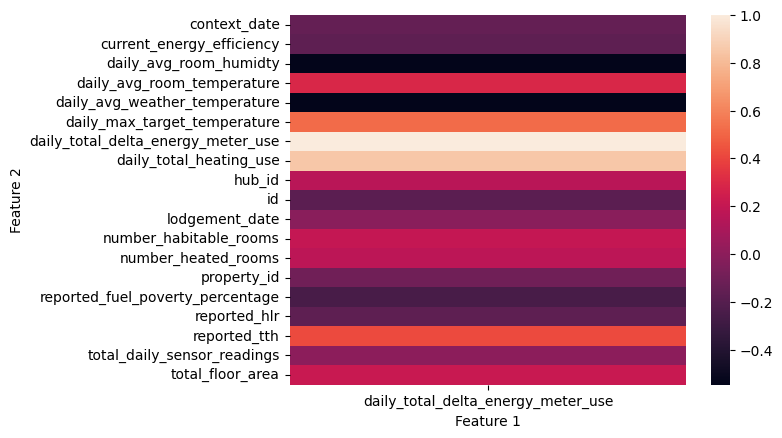

In [659]:
pivot_df = corr_df[corr_df['Feature 1'] == 'daily_total_delta_energy_meter_use'].pivot(index = 'Feature 1', columns = 'Feature 2', values = 'Correlation').T
sns.heatmap(pivot_df)

## Preprocessing

In [550]:
unique_dict = {}
def unique(dataframe):
    for column in dataframe.columns:
        unique_dict[column] =  dataframe[column].nunique()
        # print(f"{column}: {dataframe[column].nunique()} unique values")
    unique_df = pd.DataFrame([unique_dict])
    return unique_df

## Number of unique values

In [551]:
unique(results).T.rename(columns = {0:'Number of unique values'}).sort_values(by =['Number of unique values'],ascending = False)

,Number of unique values
daily_avg_room_humidty,69576
daily_avg_weather_temperature,57155
daily_avg_room_temperature,56022
reported_fuel_poverty_percentage,36597
context_date,1611
reported_hlr,707
reported_tth,579
daily_total_delta_energy_meter_use,268
total_daily_sensor_readings,160
daily_total_heating_use,145


# Remove duplicates, impute missing values and add month & year columns

In [552]:
# % of null values
results.isnull().sum().sort_values(ascending=False)/len(results)


reported_fuel_poverty_percentage      0.291088
reported_hlr                          0.210607
reported_tth                          0.186497
daily_total_delta_energy_meter_use    0.170398
daily_avg_room_temperature            0.168927
daily_avg_room_humidty                0.168927
daily_max_target_temperature          0.168846
daily_avg_weather_temperature         0.168846
daily_total_heating_use               0.155809
number_heated_rooms                   0.020125
number_habitable_rooms                0.020125
id                                    0.005913
hub_id                                0.005913
total_daily_sensor_readings           0.000000
context_date                          0.000000
total_floor_area                      0.000000
property_id                           0.000000
walls_description                     0.000000
windows_description                   0.000000
floor_description                     0.000000
built_form                            0.000000
property_type

### Lets investigate the columns which have null values and understand

In [553]:
# list of columns which have more null values and plot the distribution only for the numerical ones
null_cols = []
id_columns = ['property_id', 'hub_id', 'id']
for columns in results.select_dtypes(include =['int64', 'float64']).columns:
    if results[columns].isnull().sum() > 0: # if there are missing values
        null_cols.append(columns)

filter_null_colls = [col for col in null_cols if col not in id_columns]
results[filter_null_colls]

,number_habitable_rooms,number_heated_rooms,reported_hlr,reported_tth,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_delta_energy_meter_use,daily_total_heating_use,reported_fuel_poverty_percentage
307499,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308600,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309701,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310802,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311903,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495621,3.0,3.0,2.56,0.8,55.007042,24.262676,20.281690,5.0,15.0,0.0,NaN
494025,3.0,3.0,2.56,0.8,53.317606,25.134507,19.981690,5.0,30.0,0.0,NaN
495636,3.0,3.0,2.56,0.8,53.317606,25.134507,19.981690,5.0,30.0,0.0,NaN
494032,3.0,3.0,2.56,0.8,52.684397,26.186525,21.677305,5.0,14.0,0.0,NaN


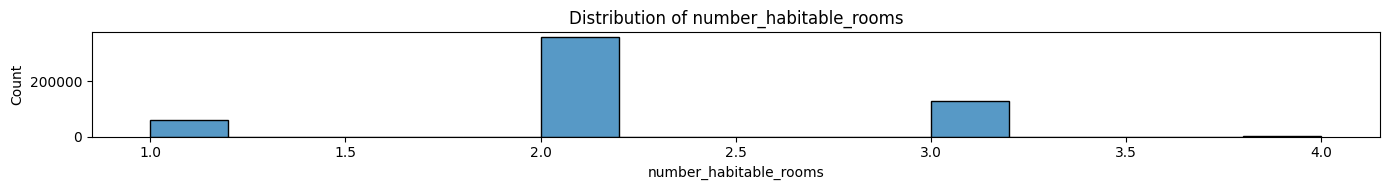

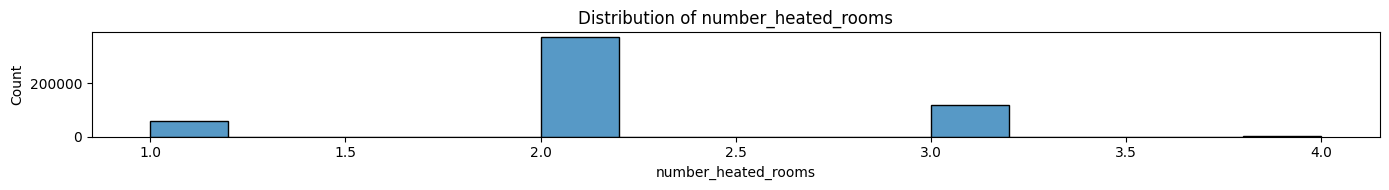

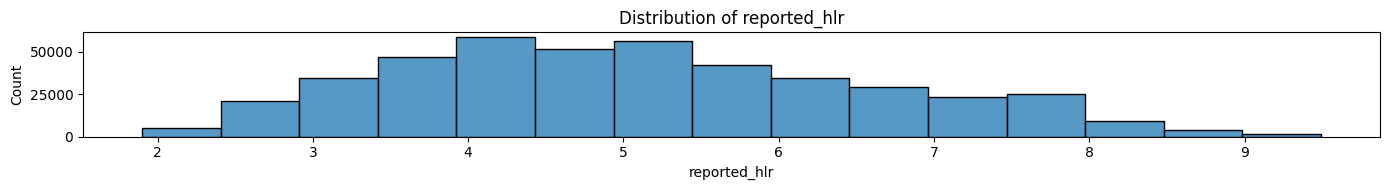

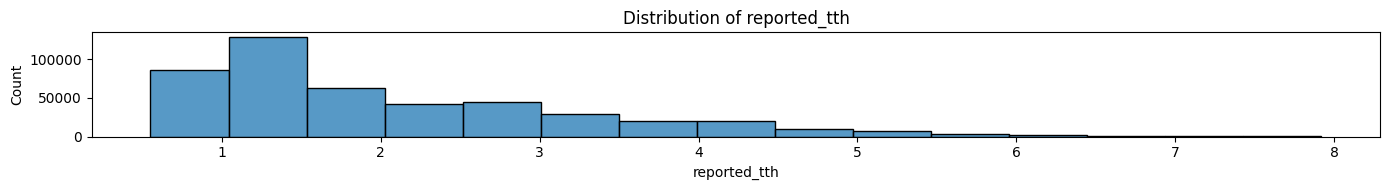

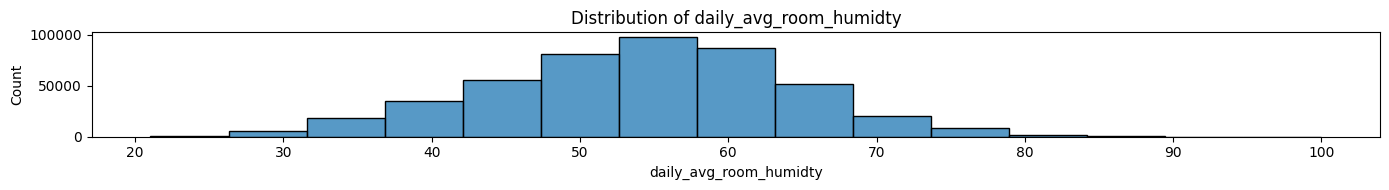

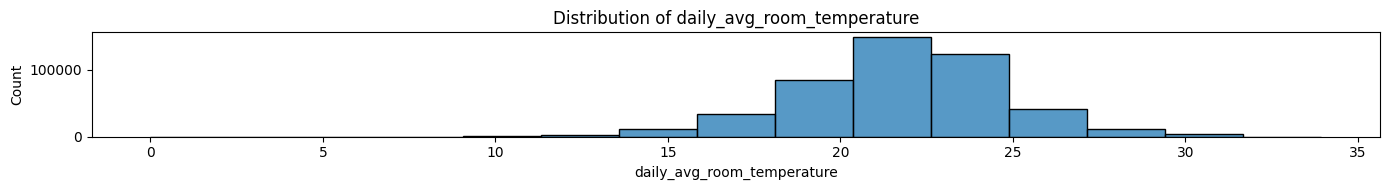

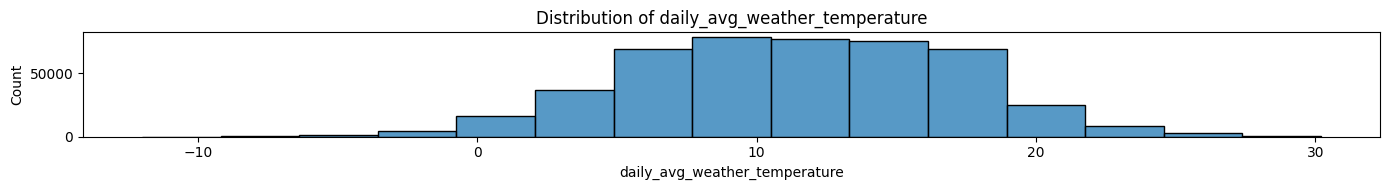

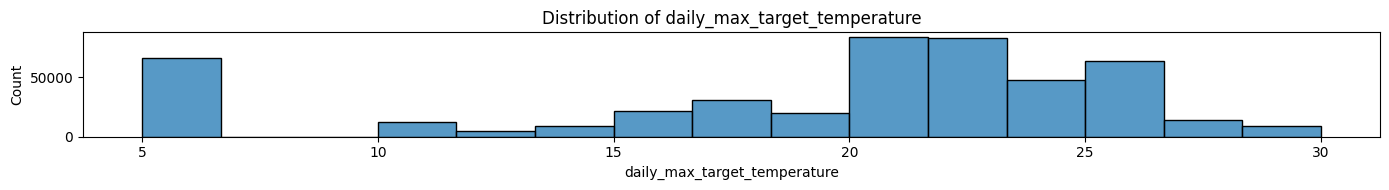

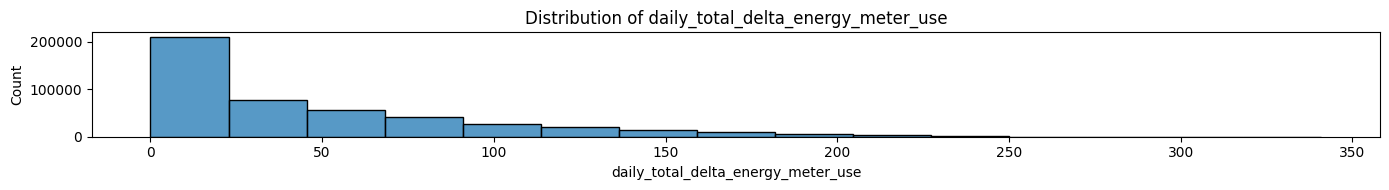

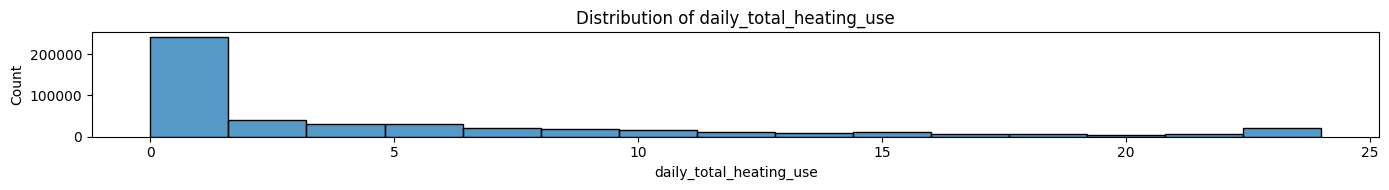

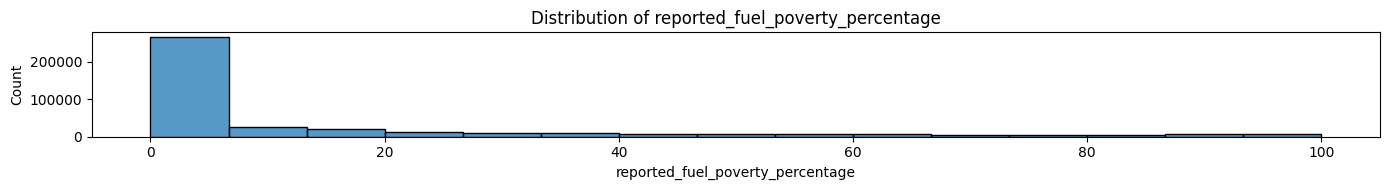

In [554]:
# plotting the distribution of the colums with missing values
for cols in results[filter_null_colls]:
    plt.figure(figsize=(14,2))
    plt.title(f'Distribution of {cols}')
    sns.histplot(data = results, x = cols, bins = 15)
    plt.tight_layout()

## We need to remove:
- number_of_paired_sensors, zone','type','hub_type','heating_system_model_no','number_of_zones'

For numerical features - we can simple impute using the mean
For categorical features - we can do the most frequent
But this must be taken per property ID

In [555]:
# Dropping un important features
results.drop(columns = 'number_of_paired_sensors',inplace = True)

KeyError: "['number_of_paired_sensors'] not found in axis"

In [ ]:
# Dropping these features because they don't seem to be important!
# And they caused issues because properties such as 20223 had no values ['number_habitable_rooms' 'number_heated_rooms']
# check whether the variable varies over time, if 75% does not vary then we can drop
results.drop(columns = ['zone','type','hub_type','heating_system_model_no','number_of_zones', 'daily_temp_below18c_total_sensor_readings'],inplace = True)

# Interesting findings:
# properties such as 20223 had no values ['number_habitable_rooms' 'number_heated_rooms'], which caused errors when simple imputing
# we need to build a function which iterates over each property ID and identifies what columns have missing values then we could drop that property ID

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558615 entries, 307499 to 495643
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   property_id                         558615 non-null  int64         
 1   hub_id                              555312 non-null  float64       
 2   id                                  555312 non-null  float64       
 3   occupied                            558615 non-null  bool          
 4   heating_system                      558615 non-null  object        
 5   heating_system_manufacturer         558615 non-null  object        
 6   occurred                            558615 non-null  object        
 7   lodgement_date                      558615 non-null  datetime64[ns]
 8   current_energy_efficiency           558615 non-null  int64         
 9   property_type                       558615 non-null  object        
 10  built_fo

# Simple imputing with Mean and most frequent per each property 

Logic:
1. Provide a list of all the property IDs
2. Remove the properties which have columns with NANs everywhere
3. Simple impute the remaining propery_list
4. Store in a new dataframe = results_imputed

In [ ]:
property_list = results['property_id'].unique()

# we need to remove 20223 because it these two columns have NAN everyone, thus simple imputing does not work!
results[results['property_id'] == 20223]['number_habitable_rooms'].isnull().sum()
results[results['property_id'] == 20223]['number_heated_rooms'].isnull().sum()
results[results['property_id'] == 20223]

# list of property_ids to remove
values_to_remove = [20223, 20313,20388,20530,20680]

# create a boolean mask for arrays
mask = np.isin(property_list, values_to_remove)

property_list = property_list[~mask]
property_list

array([20083, 20084, 20101, 20112, 20115, 20118, 20130, 20137, 20154,
       20160, 20180, 20187, 20192, 20218, 20220, 20222, 20238, 20240,
       20246, 20249, 20250, 20251, 20252, 20255, 20262, 20267, 20268,
       20272, 20273, 20276, 20277, 20281, 20288, 20293, 20300, 20301,
       20307, 20309, 20312, 20316, 20319, 20321, 20322, 20330, 20344,
       20357, 20359, 20360, 20361, 20372, 20374, 20376, 20377, 20378,
       20380, 20383, 20387, 20397, 20398, 20399, 20403, 20408, 20419,
       20422, 20425, 20427, 20429, 20436, 20446, 20449, 20454, 20456,
       20457, 20528, 20529, 20534, 20959, 21127, 22552, 23394, 23838])

In [ ]:
# simple impute per property id
from sklearn.impute import SimpleImputer

# Specify your numerical and categorical features
num_features = results.select_dtypes('float64').columns
cat_features = results.select_dtypes('object').columns

# initialise the imputers
numerical_imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
categorical_imputer = SimpleImputer(missing_values= np.nan ,strategy='most_frequent')


# build the logic to impute per property id then concat all results
all = []
for property in property_list:
    df = results[results['property_id'] == property]
    df.loc[:,num_features] = numerical_imputer.fit_transform(df[num_features])
    df.loc[:,cat_features] = categorical_imputer.fit_transform(df[cat_features])
    # append to the list
    all.append(df)
results_imputed = pd.concat(all,ignore_index=True)
print('finished imputing')
    
    


finished imputing


In [556]:
# the imputed results with no missing values !
results_imputed

,property_id,hub_id,id,occupied,heating_system,heating_system_manufacturer,occurred,lodgement_date,current_energy_efficiency,property_type,built_form,floor_description,windows_description,walls_description,roof_description,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_heating_use,reported_fuel_poverty_percentage,property_type_Bungalow,property_type_Flat,property_type_House,built_form_Detached,built_form_Enclosed End-Terrace,built_form_End-Terrace,built_form_Mid-Terrace,built_form_NO DATA!,built_form_Semi-Detached,floor_description_(another dwelling below),floor_description_(other premises below),floor_description_Average thermal transmittance 1.20 W/m-¦K,"floor_description_Solid, no insulation (assumed)",windows_description_Fully double glazed,windows_description_Mostly double glazing,windows_description_Single glazed,walls_description_Average thermal transmittance 0.56 W/m?K,walls_description_Average thermal transmittance 0.70 W/m-¦K,"walls_description_Cavity wall, as built, no insulation (assumed)","walls_description_Cavity wall, as built, partial insulation (assumed)","walls_description_Cavity wall, filled cavity","walls_description_System built, as built, no insulation (assumed)",roof_description_(another dwelling above),roof_description_(other premises above),roof_description_Average thermal transmittance 0.15 W/m?K,"roof_description_Pitched, 100 mm loft insulation","roof_description_Pitched, 100mm loft insulation","roof_description_Pitched, 150 mm loft insulation","roof_description_Pitched, 150mm loft insulation","roof_description_Pitched, 200 mm loft insulation","roof_description_Pitched, 200mm loft insulation","roof_description_Pitched, 250 mm loft insulation","roof_description_Pitched, 250mm loft insulation","roof_description_Pitched, 270 mm loft insulation","roof_description_Pitched, 300 mm loft insulation","roof_description_Pitched, 300+ mm loft insulation","roof_description_Pitched, limited insulation (assumed)"
0,20083,20071.0,20394.0,True,HEAT_PUMP_GSHP,KENSA,05/09/23 05:37,2021-01-12,0.311111,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 150 mm loft insulation",0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20083,20071.0,20394.0,True,HEAT_PUMP_GSHP,KENSA,05/09/23 05:37,2021-01-30,0.355556,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 250 mm loft insulation",0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20083,20071.0,20394.0,True,HEAT_PUMP_GSHP,KENSA,05/09/23 05:37,2020-10-06,0.200000,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, as built, no insulation (assumed)","Pitched, 150 mm loft insulation",0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20083,20071.0,20394.0,True,HEAT_PUMP_GSHP,KENSA,05/09/23 05:37,2018-04-23,0.511111,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 300 mm loft insulation",0.666667,0.666667,0.506146,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,

# Lets analyse our Features to determine which we want, scale and onehot encode them

In [557]:
results_imputed.columns

Index(['property_id', 'hub_id', 'id', 'occupied', 'heating_system',
       'heating_system_manufacturer', 'occurred', 'lodgement_date',
       'current_energy_efficiency', 'property_type', 'built_form',
       'floor_description', 'windows_description', 'walls_description',
       'roof_description', 'number_habitable_rooms', 'number_heated_rooms',
       'total_floor_area', 'context_date', 'reported_hlr', 'reported_tth',
       'total_daily_sensor_readings', 'daily_avg_room_humidty',
       'daily_avg_room_temperature', 'daily_avg_weather_temperature',
       'daily_max_target_temperature', 'daily_total_heating_use',
       'reported_fuel_poverty_percentage', 'property_type_Bungalow',
       'property_type_Flat', 'property_type_House', 'built_form_Detached',
       'built_form_Enclosed End-Terrace', 'built_form_End-Terrace',
       'built_form_Mid-Terrace', 'built_form_NO DATA!',
       'built_form_Semi-Detached',
       'floor_description_(another dwelling below)',
       'floor_desc

In [558]:
results_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546428 entries, 0 to 546427
Data columns (total 65 columns):
 #   Column                                                                 Non-Null Count   Dtype         
---  ------                                                                 --------------   -----         
 0   property_id                                                            546428 non-null  int64         
 1   hub_id                                                                 546428 non-null  float64       
 2   id                                                                     546428 non-null  float64       
 3   occupied                                                               546428 non-null  bool          
 4   heating_system                                                         546428 non-null  object        
 5   heating_system_manufacturer                                            546428 non-null  object        
 6   occurred            

In [559]:
# Specify the Y and X
y = results_imputed['daily_total_delta_energy_meter_use']
X = results_imputed.drop(columns = 'daily_total_delta_energy_meter_use', inplace=True)

KeyError: 'daily_total_delta_energy_meter_use'

In [ ]:
X_num = results_imputed.select_dtypes(include = ['int64', 'float64']) # specify only the numerical features
X_cat = results_imputed.select_dtypes(include = ['object'])

In [ ]:
# let's remove the IDs !
X_num_features = [col for col in X_num if col not in id_columns]
X_num_features

['current_energy_efficiency',
 'number_habitable_rooms',
 'number_heated_rooms',
 'total_floor_area',
 'reported_hlr',
 'reported_tth',
 'total_daily_sensor_readings',
 'daily_avg_room_humidty',
 'daily_avg_room_temperature',
 'daily_avg_weather_temperature',
 'daily_max_target_temperature',
 'daily_total_heating_use',
 'reported_fuel_poverty_percentage']

## Lets analyse all the numerical features for their distribution, outliers and whether they follow a normal distribution

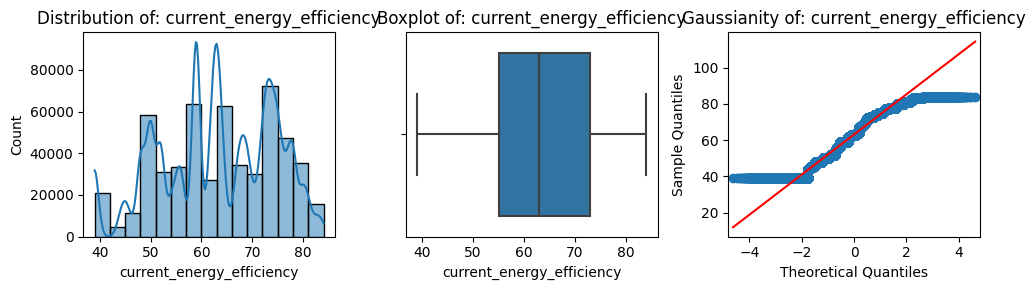

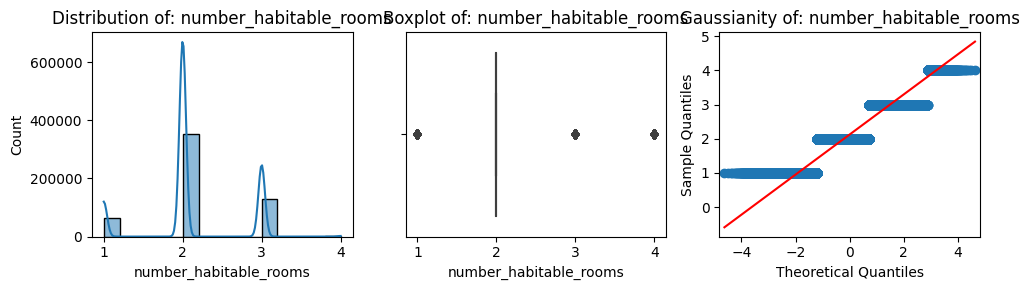

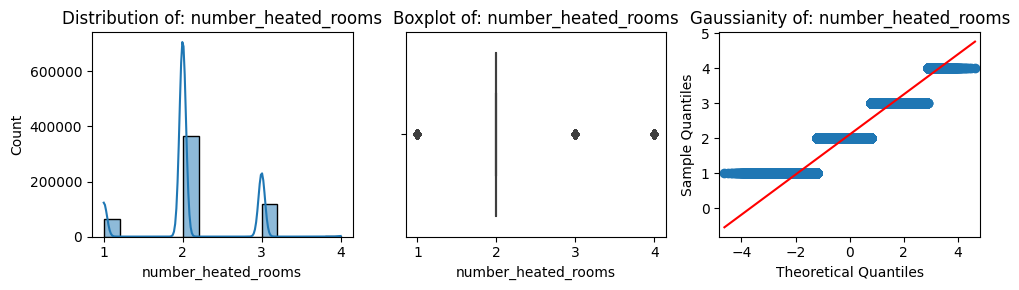

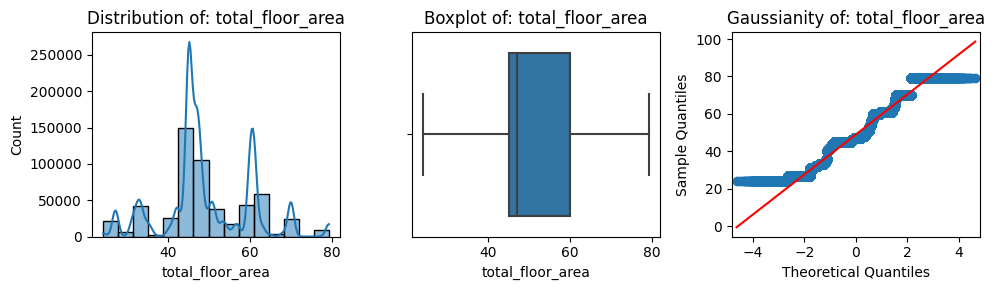

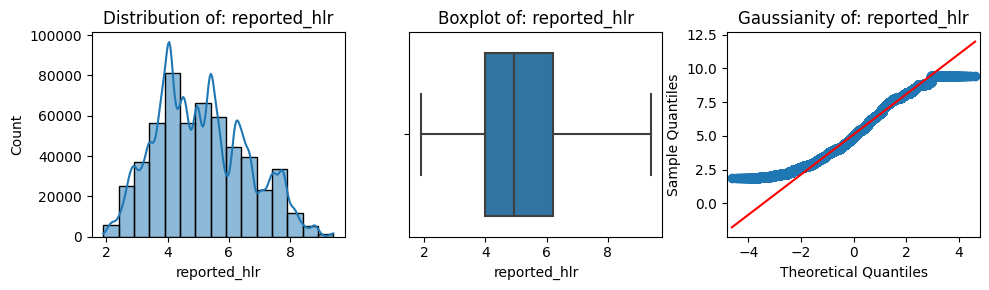

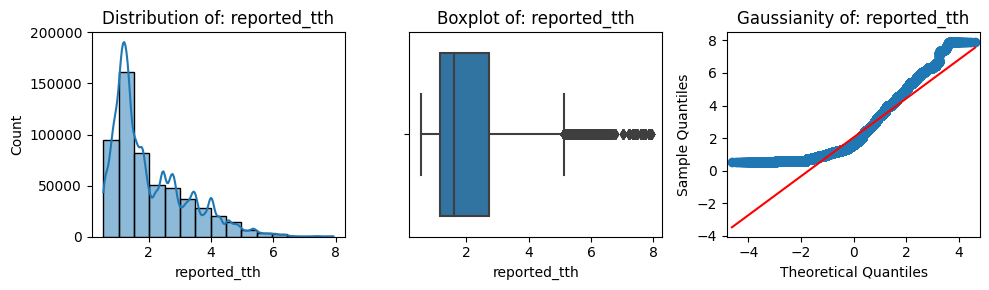

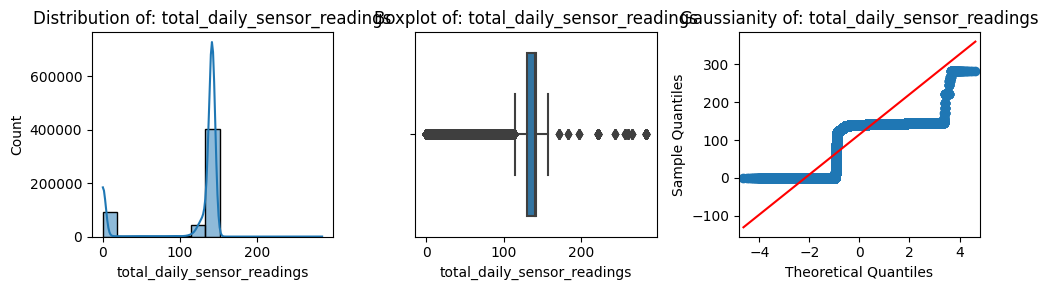

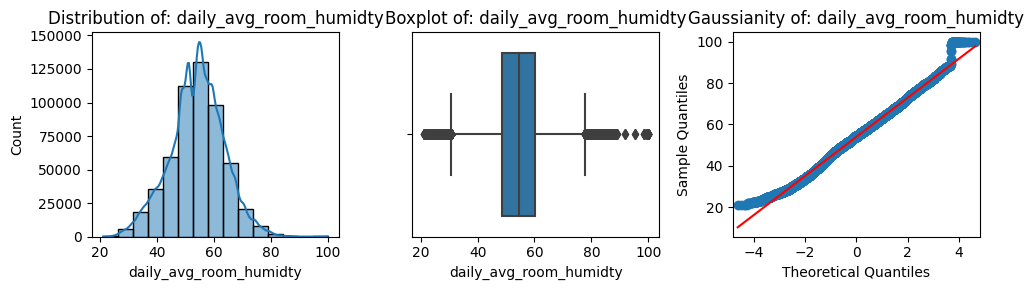

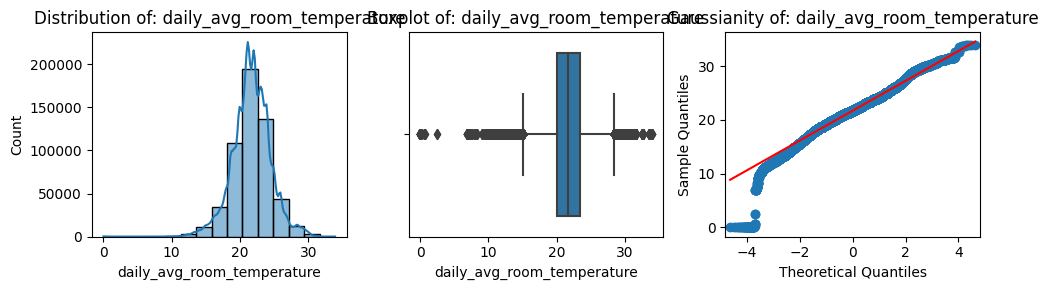

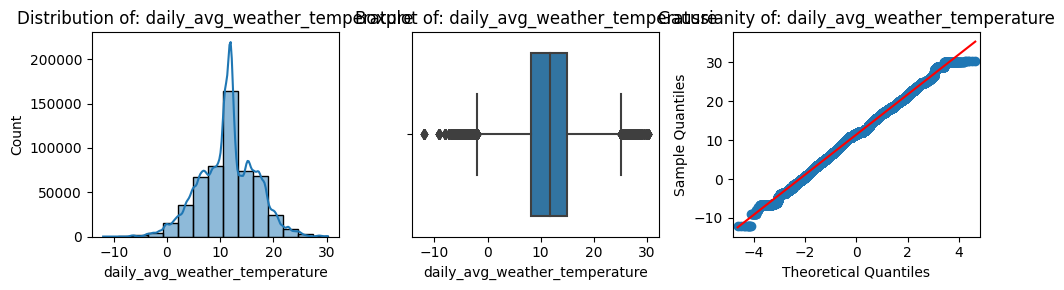

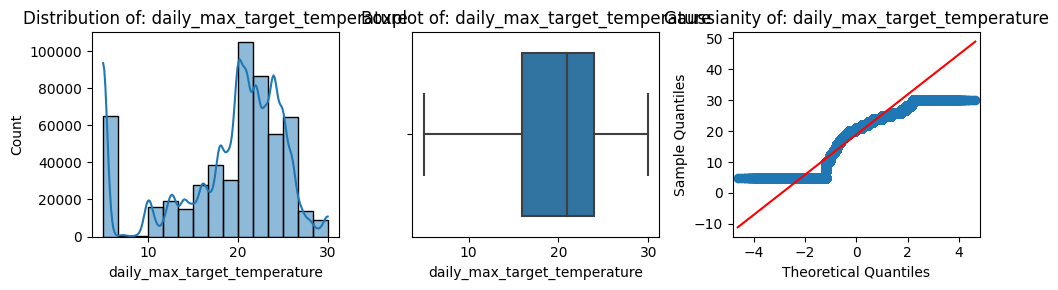

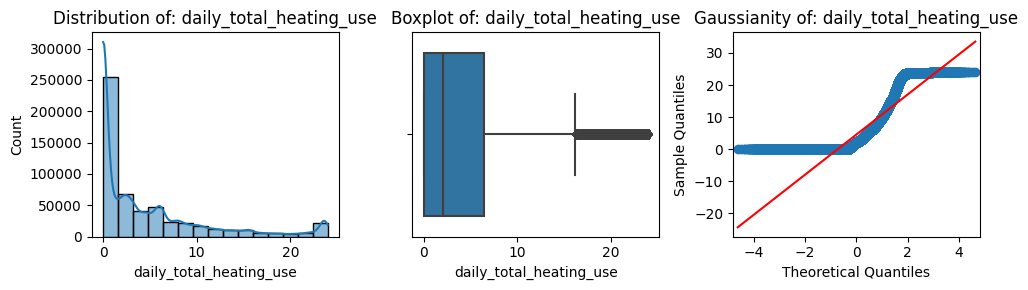

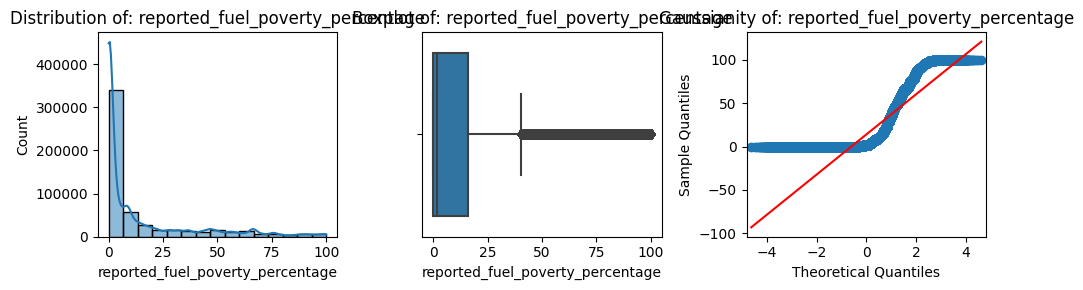

In [560]:
# These are the distributions for all properties

for numerical_features in X_num.columns:
    if numerical_features not in id_columns:
        # the ax allows you to specify which column you want
        fig, ax = plt.subplots(1,3,figsize=(10,3))
        
        # histogram for an overview of the distribution
        ax[0].set_title(f'Distribution of: {numerical_features}')
        sns.histplot(data=X_num, x =numerical_features, kde = True, ax = ax[0], bins =15)
        
        # boxplot to detect outliers
        ax[1].set_title(f'Boxplot of: {numerical_features}')
        sns.boxplot(data = X_num, x = numerical_features, ax = ax[1])
        
        # analysing whether the feature is normally distributed or not
        ax[2].set_title(f'Gaussianity of: {numerical_features}')
        qqplot(X_num[numerical_features], line='s', ax=ax[2])
        
        plt.tight_layout()

# Scalers

In [561]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [562]:
# Let's scale out data using MinMaxScaler

# Initialize 
minmax = MinMaxScaler()

# fit and transform
results_imputed[X_num_features] = minmax.fit_transform(results_imputed[X_num_features])

In [563]:
# we have now scaled our numerical data!
results_imputed.describe().T

# we can drop variables which do not vary over time such as: daily_temp_below18c_total_sensor_readings

,count,mean,min,25%,50%,75%,max,std
property_id,546428.0,20368.19307,20083.0,20180.0,20307.0,20399.0,23838.0,474.408639
hub_id,546428.0,20380.539773,20067.0,20174.0,20293.0,20495.0,21145.0,292.288074
id,546428.0,20681.48027,20103.0,20389.0,20593.0,21063.0,21296.0,371.620221
lodgement_date,546428,2018-01-17 14:48:12.343730688,2008-10-29 00:00:00,2014-11-25 00:00:00,2019-09-02 00:00:00,2021-01-03 00:00:00,2022-02-01 00:00:00,NaN
current_energy_efficiency,546428.0,0.53643,0.0,0.355556,0.533333,0.755556,1.0,0.245854
number_habitable_rooms,546428.0,0.375173,0.0,0.333333,0.333333,0.333333,1.0,0.195542
number_heated_rooms,546428.0,0.368457,0.0,0.333333,0.333333,0.333333,1.0,0.191088
total_floor_area,546428.0,0.451807,0.0,0.37961,0.415763,0.650759,1.0,0.193879
context_date,546428,2022-02-28 10:23:22.452290560,2019-04-08 00:00:00,2021-05-29 18:00:00,2022-03-05 00:00:00,2022-12-04 00:00:00,2023-09-04 00:00:00,NaN
reported_hlr,546428.0,0.426366,0.0,0.278296,0.406125,0.57385,1.0,0.197994


# Lets OHE, label encode our categorical variables

In [564]:
X_cat
cat_features = X_cat.columns
X_cat = X_cat.loc[:,X_cat.columns != 'occurred']
X_cat

,property_type,built_form,floor_description,windows_description,walls_description,roof_description
0,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 150 mm loft insulation"
1,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 250 mm loft insulation"
2,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, as built, no insulation (assumed)","Pitched, 150 mm loft insulation"
3,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 300 mm loft insulation"
4,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 270 mm loft insulation"
...,...,...,...,...,...,...
546423,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546424,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546425,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546426,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)


In [565]:
cat_features

Index(['property_type', 'built_form', 'floor_description',
       'windows_description', 'walls_description', 'roof_description'],
      dtype='object')

In [566]:
### let's check how many occurences if we were to OHE to code
cat_dict = {}
for cat in X_cat:
    cat_dict[cat] = X_cat[cat].nunique()
    
unique_occurences = pd.DataFrame.from_dict([cat_dict]).T
unique_occurences.rename(columns = {0:'Occurences'}).sort_values(by = 'Occurences', ascending= False) 

# we could potentially drop Kensa and Heating_system as they do not provide any explanatory information

,Occurences
roof_description,15
built_form,6
walls_description,6
floor_description,4
property_type,3
windows_description,3


### dropping heating_system_manufacturer	& heating_system

Because they do not bring any important information

In [567]:
X_cat.drop(columns = ['heating_system', 'heating_system_manufacturer'], inplace = True)

KeyError: "['heating_system', 'heating_system_manufacturer'] not found in axis"

In [568]:
X_cat.describe().T

,count,unique,top,freq
property_type,546428,3,Flat,377919
built_form,546428,6,Semi-Detached,210756
floor_description,546428,4,"Solid, no insulation (assumed)",374946
windows_description,546428,3,Fully double glazed,536521
walls_description,546428,6,"Cavity wall, filled cavity",478887
roof_description,546428,15,(another dwelling above),213282


In [569]:
X_cat

,property_type,built_form,floor_description,windows_description,walls_description,roof_description
0,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 150 mm loft insulation"
1,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 250 mm loft insulation"
2,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, as built, no insulation (assumed)","Pitched, 150 mm loft insulation"
3,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 300 mm loft insulation"
4,Bungalow,Mid-Terrace,"Solid, no insulation (assumed)",Fully double glazed,"Cavity wall, filled cavity","Pitched, 270 mm loft insulation"
...,...,...,...,...,...,...
546423,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546424,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546425,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)
546426,Flat,Semi-Detached,(another dwelling below),Fully double glazed,"System built, as built, no insulation (assumed)",(another dwelling above)


In [571]:
from sklearn.preprocessing import OneHotEncoder

In [583]:
## let's one hot encode

# Initialise
ohe = OneHotEncoder(sparse=False)

# fit in the categorical variables
ohe.fit(results_imputed[X_cat.columns])

# transform the variables
results_imputed[ohe.get_feature_names_out()] = ohe.transform(results_imputed[X_cat.columns])

# Remeber to drop the original variables:
preprocessed_df = results_imputed.drop(columns = ['property_type','built_form', 'floor_description', 'windows_description','walls_description', 'roof_description' ])

/Users/stevenyanez/.pyenv/versions/3.10.6/envs/HeatPumpEnergyPredict/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [584]:
preprocessed_df.describe().T

,count,mean,min,25%,50%,75%,max,std
property_id,546428.0,20368.19307,20083.0,20180.0,20307.0,20399.0,23838.0,474.408639
hub_id,546428.0,20380.539773,20067.0,20174.0,20293.0,20495.0,21145.0,292.288074
id,546428.0,20681.48027,20103.0,20389.0,20593.0,21063.0,21296.0,371.620221
lodgement_date,546428,2018-01-17 14:48:12.343730688,2008-10-29 00:00:00,2014-11-25 00:00:00,2019-09-02 00:00:00,2021-01-03 00:00:00,2022-02-01 00:00:00,NaN
current_energy_efficiency,546428.0,0.53643,0.0,0.355556,0.533333,0.755556,1.0,0.245854
number_habitable_rooms,546428.0,0.375173,0.0,0.333333,0.333333,0.333333,1.0,0.195542
number_heated_rooms,546428.0,0.368457,0.0,0.333333,0.333333,0.333333,1.0,0.191088
total_floor_area,546428.0,0.451807,0.0,0.37961,0.415763,0.650759,1.0,0.193879
context_date,546428,2022-02-28 10:23:22.452290560,2019-04-08 00:00:00,2021-05-29 18:00:00,2022-03-05 00:00:00,2022-12-04 00:00:00,2023-09-04 00:00:00,NaN
reported_hlr,546428.0,0.426366,0.0,0.278296,0.406125,0.57385,1.0,0.197994


In [587]:
preprocessed_df['occupied'].value_counts() # we can drop occupied because it is true all everywhere

occupied
True    546428
Name: count, dtype: int64

In [588]:
preprocessed_df.drop(columns = ['occupied','id','heating_system', 'heating_system_manufacturer','lodgement_date', 'occurred'], inplace = True)

In [589]:
y

0         39.487689
1         39.487689
2         39.487689
3         39.487689
4         39.487689
            ...    
546423    15.000000
546424    30.000000
546425    30.000000
546426    14.000000
546427    14.000000
Name: daily_total_delta_energy_meter_use, Length: 546428, dtype: float64

In [590]:
preprocessed_df

,property_id,hub_id,current_energy_efficiency,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_heating_use,reported_fuel_poverty_percentage,property_type_Bungalow,property_type_Flat,property_type_House,built_form_Detached,built_form_Enclosed End-Terrace,built_form_End-Terrace,built_form_Mid-Terrace,built_form_NO DATA!,built_form_Semi-Detached,floor_description_(another dwelling below),floor_description_(other premises below),floor_description_Average thermal transmittance 1.20 W/m-¦K,"floor_description_Solid, no insulation (assumed)",windows_description_Fully double glazed,windows_description_Mostly double glazing,windows_description_Single glazed,walls_description_Average thermal transmittance 0.56 W/m?K,walls_description_Average thermal transmittance 0.70 W/m-¦K,"walls_description_Cavity wall, as built, no insulation (assumed)","walls_description_Cavity wall, as built, partial insulation (assumed)","walls_description_Cavity wall, filled cavity","walls_description_System built, as built, no insulation (assumed)",roof_description_(another dwelling above),roof_description_(other premises above),roof_description_Average thermal transmittance 0.15 W/m?K,"roof_description_Pitched, 100 mm loft insulation","roof_description_Pitched, 100mm loft insulation","roof_description_Pitched, 150 mm loft insulation","roof_description_Pitched, 150mm loft insulation","roof_description_Pitched, 200 mm loft insulation","roof_description_Pitched, 200mm loft insulation","roof_description_Pitched, 250 mm loft insulation","roof_description_Pitched, 250mm loft insulation","roof_description_Pitched, 270 mm loft insulation","roof_description_Pitched, 300 mm loft insulation","roof_description_Pitched, 300+ mm loft insulation","roof_description_Pitched, limited insulation (assumed)"
0,20083,20071.0,0.311111,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20083,20071.0,0.355556,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20083,20071.0,0.200000,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20083,20071.0,0.511111,0.666667,0.666667,0.506146,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20083,20071.0,0.511111,0.333333,0.333333,0.650759,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546423,23838,21079.0,0.733333,0.666667,0.666667,0.831526,2023-09-02,0.087883,0.033921,0.500000,0.430236,0.714855,0.764969,0.000000,0.000000,0.037442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546424,23838,21079.0,0.733333,0.666667,0.666

In [591]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546428 entries, 0 to 546427
Data columns (total 53 columns):
 #   Column                                                                 Non-Null Count   Dtype         
---  ------                                                                 --------------   -----         
 0   property_id                                                            546428 non-null  int64         
 1   hub_id                                                                 546428 non-null  float64       
 2   current_energy_efficiency                                              546428 non-null  float64       
 3   number_habitable_rooms                                                 546428 non-null  float64       
 4   number_heated_rooms                                                    546428 non-null  float64       
 5   total_floor_area                                                       546428 non-null  float64       
 6   context_date        

### must change to date time

### Converting to Month and Year

In [592]:
preprocessed_df['month'] = preprocessed_df['context_date'].dt.month
preprocessed_df['year'] = preprocessed_df['context_date'].dt.year

In [593]:
preprocessed_df

,property_id,hub_id,current_energy_efficiency,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_heating_use,reported_fuel_poverty_percentage,property_type_Bungalow,property_type_Flat,property_type_House,built_form_Detached,built_form_Enclosed End-Terrace,built_form_End-Terrace,built_form_Mid-Terrace,built_form_NO DATA!,built_form_Semi-Detached,floor_description_(another dwelling below),floor_description_(other premises below),floor_description_Average thermal transmittance 1.20 W/m-¦K,"floor_description_Solid, no insulation (assumed)",windows_description_Fully double glazed,windows_description_Mostly double glazing,windows_description_Single glazed,walls_description_Average thermal transmittance 0.56 W/m?K,walls_description_Average thermal transmittance 0.70 W/m-¦K,"walls_description_Cavity wall, as built, no insulation (assumed)","walls_description_Cavity wall, as built, partial insulation (assumed)","walls_description_Cavity wall, filled cavity","walls_description_System built, as built, no insulation (assumed)",roof_description_(another dwelling above),roof_description_(other premises above),roof_description_Average thermal transmittance 0.15 W/m?K,"roof_description_Pitched, 100 mm loft insulation","roof_description_Pitched, 100mm loft insulation","roof_description_Pitched, 150 mm loft insulation","roof_description_Pitched, 150mm loft insulation","roof_description_Pitched, 200 mm loft insulation","roof_description_Pitched, 200mm loft insulation","roof_description_Pitched, 250 mm loft insulation","roof_description_Pitched, 250mm loft insulation","roof_description_Pitched, 270 mm loft insulation","roof_description_Pitched, 300 mm loft insulation","roof_description_Pitched, 300+ mm loft insulation","roof_description_Pitched, limited insulation (assumed)",month,year
0,20083,20071.0,0.311111,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020
1,20083,20071.0,0.355556,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,2020
2,20083,20071.0,0.200000,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020
3,20083,20071.0,0.511111,0.666667,0.666667,0.506146,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2020
4,20083,20071.0,0.511111,0.333333,0.333333,0.650759,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546423,23838,21079.0,0.733333,0.666667,0.666667,0.831526,2023-09-02,0.087883,0.033921,0.500000,0.430236,0.714855,0.764969,0.000000,0.000000,0.037442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [602]:
y.shape

(546428,)

# Then we will do feature permutation with our preprocessed dataframe

In [661]:
y

0         39.487689
1         39.487689
2         39.487689
3         39.487689
4         39.487689
            ...    
546423    15.000000
546424    30.000000
546425    30.000000
546426    14.000000
546427    14.000000
Name: daily_total_delta_energy_meter_use, Length: 546428, dtype: float64

In [668]:
## Do we set property ID as the index?
preprocessed_df

,property_id,hub_id,current_energy_efficiency,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_heating_use,reported_fuel_poverty_percentage,property_type_Bungalow,property_type_Flat,property_type_House,built_form_Detached,built_form_Enclosed End-Terrace,built_form_End-Terrace,built_form_Mid-Terrace,built_form_NO DATA!,built_form_Semi-Detached,floor_description_(another dwelling below),floor_description_(other premises below),floor_description_Average thermal transmittance 1.20 W/m-¦K,"floor_description_Solid, no insulation (assumed)",windows_description_Fully double glazed,windows_description_Mostly double glazing,windows_description_Single glazed,walls_description_Average thermal transmittance 0.56 W/m?K,walls_description_Average thermal transmittance 0.70 W/m-¦K,"walls_description_Cavity wall, as built, no insulation (assumed)","walls_description_Cavity wall, as built, partial insulation (assumed)","walls_description_Cavity wall, filled cavity","walls_description_System built, as built, no insulation (assumed)",roof_description_(another dwelling above),roof_description_(other premises above),roof_description_Average thermal transmittance 0.15 W/m?K,"roof_description_Pitched, 100 mm loft insulation","roof_description_Pitched, 100mm loft insulation","roof_description_Pitched, 150 mm loft insulation","roof_description_Pitched, 150mm loft insulation","roof_description_Pitched, 200 mm loft insulation","roof_description_Pitched, 200mm loft insulation","roof_description_Pitched, 250 mm loft insulation","roof_description_Pitched, 250mm loft insulation","roof_description_Pitched, 270 mm loft insulation","roof_description_Pitched, 300 mm loft insulation","roof_description_Pitched, 300+ mm loft insulation","roof_description_Pitched, limited insulation (assumed)",month,year
0,20083,20071.0,0.311111,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020
1,20083,20071.0,0.355556,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,2020
2,20083,20071.0,0.200000,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020
3,20083,20071.0,0.511111,0.666667,0.666667,0.506146,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2020
4,20083,20071.0,0.511111,0.333333,0.333333,0.650759,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.028350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546423,23838,21079.0,0.733333,0.666667,0.666667,0.831526,2023-09-02,0.087883,0.033921,0.500000,0.430236,0.714855,0.764969,0.000000,0.000000,0.037442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Lets do some modelling with 1 property!

In [670]:
one_prop = preprocessed_df[preprocessed_df['property_id'] ==20083]

In [675]:
one_prop['day'] = one_prop['context_date'].dt.day

/var/folders/3_/587l4gzx3h162xb3md29jqz40000gn/T/ipykernel_5598/3516807710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_prop['day'] = one_prop['context_date'].dt.day


In [679]:
one_prop

,property_id,hub_id,current_energy_efficiency,number_habitable_rooms,number_heated_rooms,total_floor_area,context_date,reported_hlr,reported_tth,total_daily_sensor_readings,daily_avg_room_humidty,daily_avg_room_temperature,daily_avg_weather_temperature,daily_max_target_temperature,daily_total_heating_use,reported_fuel_poverty_percentage,property_type_Bungalow,property_type_Flat,property_type_House,built_form_Detached,built_form_Enclosed End-Terrace,built_form_End-Terrace,built_form_Mid-Terrace,built_form_NO DATA!,built_form_Semi-Detached,floor_description_(another dwelling below),floor_description_(other premises below),floor_description_Average thermal transmittance 1.20 W/m-¦K,"floor_description_Solid, no insulation (assumed)",windows_description_Fully double glazed,windows_description_Mostly double glazing,windows_description_Single glazed,walls_description_Average thermal transmittance 0.56 W/m?K,walls_description_Average thermal transmittance 0.70 W/m-¦K,"walls_description_Cavity wall, as built, no insulation (assumed)","walls_description_Cavity wall, as built, partial insulation (assumed)","walls_description_Cavity wall, filled cavity","walls_description_System built, as built, no insulation (assumed)",roof_description_(another dwelling above),roof_description_(other premises above),roof_description_Average thermal transmittance 0.15 W/m?K,"roof_description_Pitched, 100 mm loft insulation","roof_description_Pitched, 100mm loft insulation","roof_description_Pitched, 150 mm loft insulation","roof_description_Pitched, 150mm loft insulation","roof_description_Pitched, 200 mm loft insulation","roof_description_Pitched, 200mm loft insulation","roof_description_Pitched, 250 mm loft insulation","roof_description_Pitched, 250mm loft insulation","roof_description_Pitched, 270 mm loft insulation","roof_description_Pitched, 300 mm loft insulation","roof_description_Pitched, 300+ mm loft insulation","roof_description_Pitched, limited insulation (assumed)",month,year,day
0,20083,20071.0,0.311111,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020,30
1,20083,20071.0,0.355556,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,2020,30
2,20083,20071.0,0.200000,0.333333,0.333333,0.578453,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2020,30
3,20083,20071.0,0.511111,0.666667,0.666667,0.506146,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2020,30
4,20083,20071.0,0.511111,0.333333,0.333333,0.650759,2020-08-30,0.315277,0.073470,0.000000,0.362764,0.615267,0.541989,0.607992,0.127749,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,2020,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,20083,20071.0,0.311111,0.333333,0.333333,0.578453,2023-09-04,0.351531,0.059701,0.496479,0.499832,0.691276,0.777974,0.560000,0.000000,0.02835,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [681]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

ModuleNotFoundError: No module named 'tensorflow'

<Axes: xlabel='daily_total_delta_energy_meter_use', ylabel='Count'>

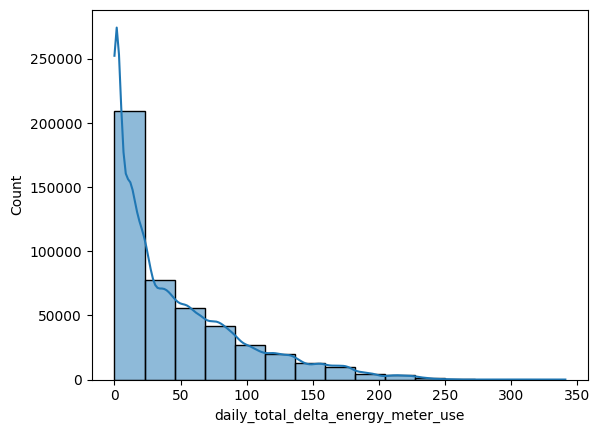

In [662]:
# Plotting the distribution of our features
sns.histplot(data = results, x  = 'daily_total_delta_energy_meter_use', kde = True, bins = 15)

<Axes: xlabel='context_date', ylabel='daily_total_delta_energy_meter_use'>

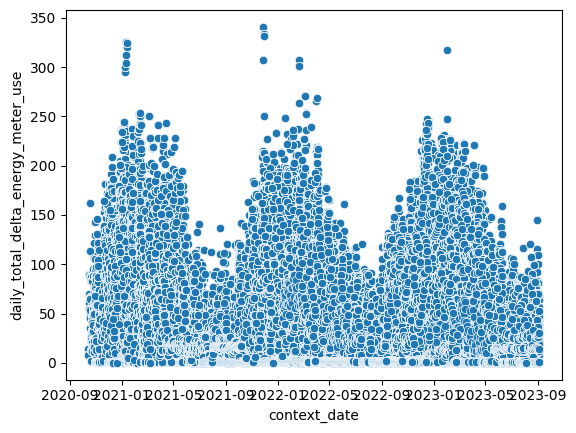

In [664]:
sns.scatterplot(data = results, y = 'daily_total_delta_energy_meter_use', x = 'context_date') 